In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

In [3]:
# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)
mean_circles = np.mean(circles,axis=1).reshape(2,1)

In [4]:
# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up
scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)
print(scatter_rectangles)
scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
print(scatter_triangles)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)
print(scatter_circles)

[[ 0.535      -0.08      ]
 [-0.08        0.08714286]]
[[0.24145455 0.02913636]
 [0.02913636 0.31409091]]
[[ 0.3000108  -0.00121682]
 [-0.00121682  0.04883923]]


In [33]:
SW = scatter_triangles+scatter_circles+scatter_rectangles
SW1=np.linalg.inv(SW)
w=np.dot(SW1,mean_rectangles-mean_triangles)
print(w)

[[1.05578011]
 [1.01524323]]


In [47]:
print (type(w))

<class 'numpy.ndarray'>


[[1.        ]
 [1.01524323]]


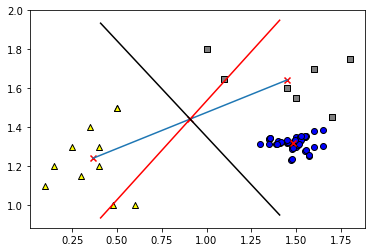

In [62]:
#Plot the data

fig, ax = plt.subplots()

ax.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')

ax.scatter(mean_rectangles[0],mean_rectangles[1],marker='x',c='red',edgecolor='black')
ax.scatter(mean_triangles[0],mean_triangles[1],marker='x',c='red',edgecolor='black')
ax.scatter(mean_circles[0],mean_circles[1],marker='x',c='red',edgecolor='black')

ax.plot((mean_rectangles[0],mean_triangles[0]), (mean_rectangles[1],mean_triangles[1] ))

mean=(mean_rectangles+mean_triangles)/2
mean1=mean+w/2
mean2=mean-w/2
ax.scatter(mean[0],mean[1],marker='x',c='red',edgecolor='black')
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='red' )

c=-w[0]/w[1]
u=np.array([1,c[0]]).reshape(2,1)
mean1=mean+u/2
mean2=mean-u/2
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='black' )

print(w)
plt.show()
